# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

In [2]:
print

<function print>

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"
units= "metric"
query_url= f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nolinsk
Processing Record 2 of Set 1 | emerald
Processing Record 3 of Set 1 | liepaja
Processing Record 4 of Set 1 | bukid
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | yanchukan
City not found. Skipping...
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | faya
Processing Record 10 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | obo
Processing Record 15 of Set 1 | voh
Processing Record 16 of Set 1 | ushtobe
Processing Record 17 of Set 1 | putnok
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | neder vindinge
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | bargal
City not found. Skipping...
Processing R

Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | nebolchi
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | mnogovershinnyy
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | dali
Processing Record 43 of Set 4 | leshukonskoye
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | balkhash
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | usak
Processing Record 0 of Set 5 | kirando
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | quechultenango
Processing Record 3 of Set 5 | litovko
Processing Record 4 of Set 5 | dinsor
City not found. Skipping...
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | bocanda
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | teberda
Processing Record 9 o

Processing Record 25 of Set 8 | sao filipe
Processing Record 26 of Set 8 | iracoubo
Processing Record 27 of Set 8 | southbridge
Processing Record 28 of Set 8 | hirtshals
Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | solwezi
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | chilca
Processing Record 33 of Set 8 | bacolod
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | bure
Processing Record 36 of Set 8 | tilichiki
Processing Record 37 of Set 8 | celestun
Processing Record 38 of Set 8 | burdur
Processing Record 39 of Set 8 | melilla
Processing Record 40 of Set 8 | bairiki
Processing Record 41 of Set 8 | selikhino
Processing Record 42 of Set 8 | kemi
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | coahuayana
Processing Record 45 of Set 8 | samsun
Processing Record 46 of Set 8 | kurdzhinovo
Processing Record 47 of Set 8 | wanning
Processing Record 48 of Set 8 | inhambane
Processing R

Processing Record 15 of Set 12 | mana
Processing Record 16 of Set 12 | merauke
Processing Record 17 of Set 12 | vysotskoye
Processing Record 18 of Set 12 | ambon
Processing Record 19 of Set 12 | yurty
Processing Record 20 of Set 12 | vanavara
Processing Record 21 of Set 12 | lamar
Processing Record 22 of Set 12 | dossor
Processing Record 23 of Set 12 | palmares do sul
Processing Record 24 of Set 12 | ust-tsilma
Processing Record 25 of Set 12 | ust-nera
Processing Record 26 of Set 12 | bartica
Processing Record 27 of Set 12 | kahului
Processing Record 28 of Set 12 | lodja
Processing Record 29 of Set 12 | dunedin
Processing Record 30 of Set 12 | berbera
Processing Record 31 of Set 12 | yichang
Processing Record 32 of Set 12 | bellevue
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | jinchang
Processing Record 35 of Set 12 | nome
Processing Record 36 of Set 12 | pimentel
Processing Record 37 of Set 12 | tshikapa
Processing Record 38 of Set 12 | solok
Processing Reco

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nolinsk,57.5596,49.9363,-4.20,92,100,5.33,RU,1675984009
1,emerald,-23.5333,148.1667,26.86,54,0,6.43,AU,1675984009
2,liepaja,56.5419,21.0367,2.99,87,100,10.29,LV,1675983879
3,bukid,5.5717,125.4056,25.89,77,100,1.78,PH,1675984009
4,busselton,-33.6500,115.3333,16.92,77,0,2.45,AU,1675983657


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nolinsk,57.5596,49.9363,-4.20,92,100,5.33,RU,1675984009
1,emerald,-23.5333,148.1667,26.86,54,0,6.43,AU,1675984009
2,liepaja,56.5419,21.0367,2.99,87,100,10.29,LV,1675983879
3,bukid,5.5717,125.4056,25.89,77,100,1.78,PH,1675984009
4,busselton,-33.6500,115.3333,16.92,77,0,2.45,AU,1675983657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

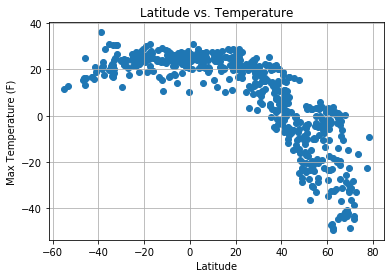

In [14]:
# Build scatter plot for latitude vs. temperature
lat=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(lat,temp,marker="o")
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

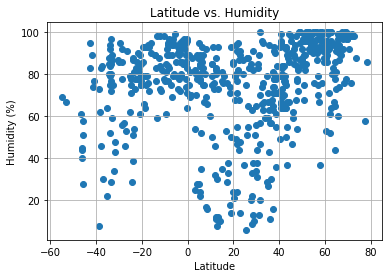

In [19]:
# Build the scatter plots for latitude vs. humidity
lat=city_data_df["Lat"]
humidity=city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(lat,humidity,marker="o")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

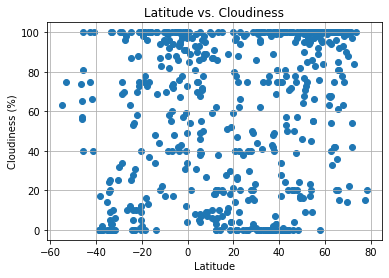

In [20]:
# Build the scatter plots for latitude vs. cloudiness
lat=city_data_df["Lat"]
cloudiness =city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(lat,cloudiness,marker="o")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

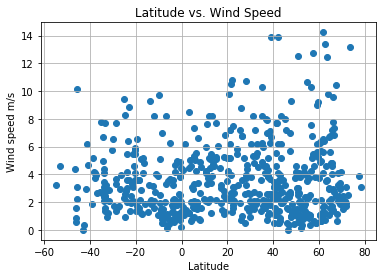

In [21]:
# Build the scatter plots for latitude vs. wind speed
lat=city_data_df["Lat"]
wind_speed =city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat,wind_speed,marker="o")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind speed m/s")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, text_coordinates):     
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nolinsk,57.5596,49.9363,-4.20,92,100,5.33,RU,1675984009
2,liepaja,56.5419,21.0367,2.99,87,100,10.29,LV,1675983879
3,bukid,5.5717,125.4056,25.89,77,100,1.78,PH,1675984009
6,muros,42.7762,-9.0603,7.69,75,0,3.59,ES,1675984011
7,faya,18.3851,42.4509,11.29,71,18,1.12,SA,1675984011


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,emerald,-23.5333,148.1667,26.86,54,0,6.43,AU,1675984009
4,busselton,-33.6500,115.3333,16.92,77,0,2.45,AU,1675983657
5,carnarvon,-24.8667,113.6333,25.21,78,87,8.27,AU,1675984010
8,vaini,-21.2000,-175.2000,28.09,83,75,3.09,TO,1675984011
10,ushuaia,-54.8000,-68.3000,11.56,69,63,3.22,AR,1675984012


###  Temperature vs. Latitude Linear Regression Plot

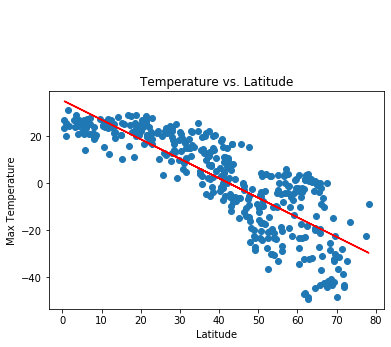

In [26]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(30,70))

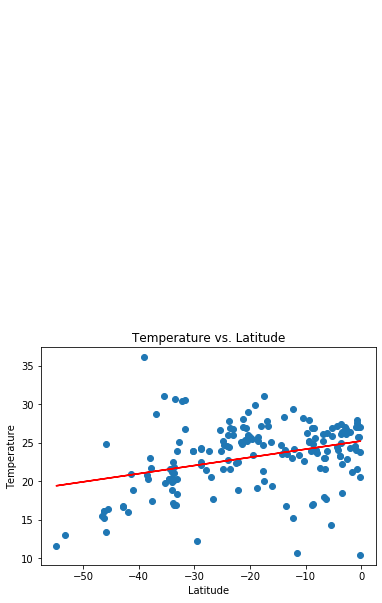

In [27]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

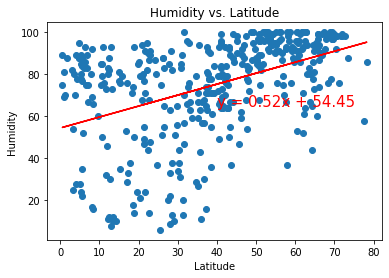

In [29]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,65))

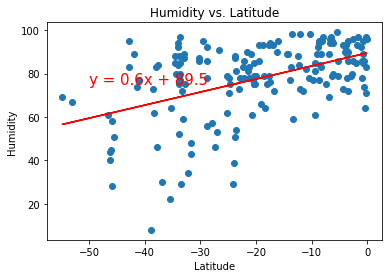

In [30]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,75))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

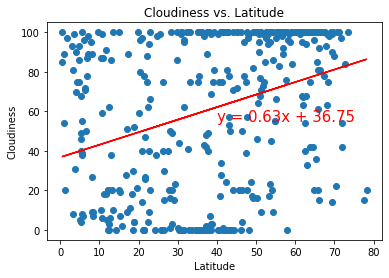

In [31]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,55))

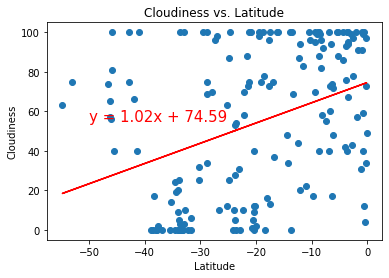

In [32]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,55))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

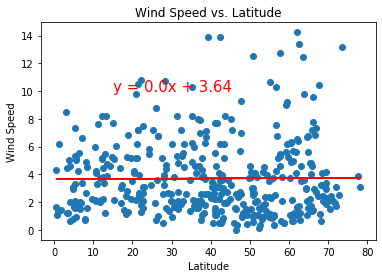

In [33]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(15,10))

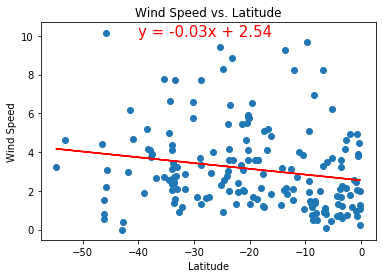

In [34]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE